In [1]:
import os
import pandas as pd

[*********************100%***********************]  1 of 1 completed

object initialized
data pull complete for:  SPY


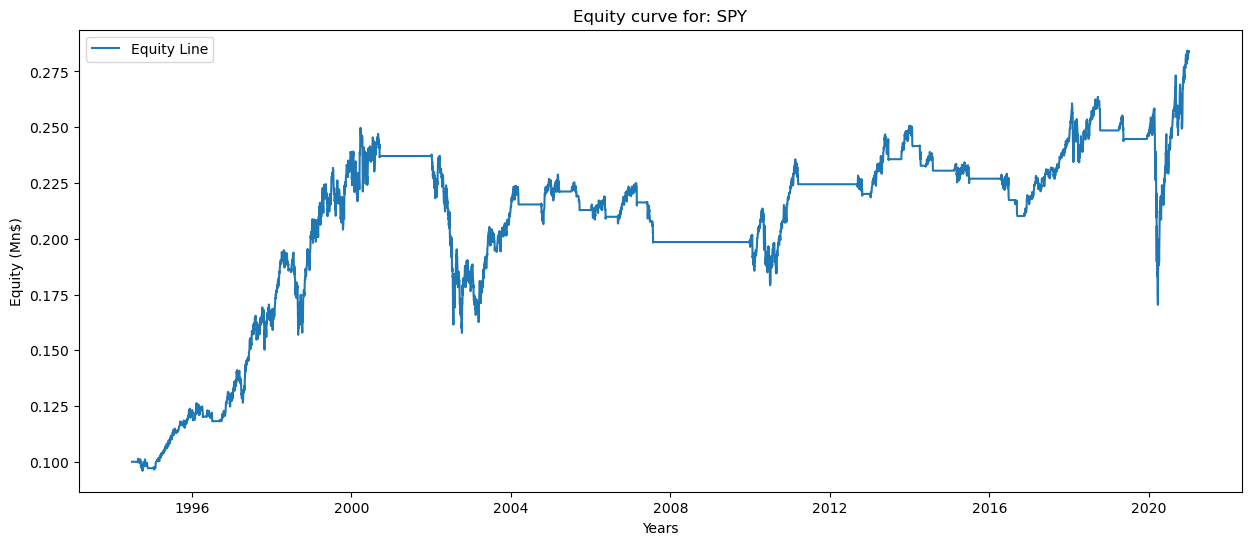

In [9]:
import sys
import logging
import pandas as pd
import matplotlib.pyplot as plt
from utils import utils
from lib_bollinger_bands import bollinger_modules as bm  # Import Bollinger Bands-related modules
from configs import configs
import seaborn as sns

def execute_bollinger(ticker, data, period, atr_factor):
    report = []
    stats = bm.execute_bollinger_strategy(
            data, bm.BollingerStrategy, period=period, atr_factor=atr_factor)

    report.append({
            'start_date': stats['Start'],
            'end_date': stats['End'],
            'return_strat': stats['Return [%]'],
            'max_drawdown': stats['Max. Drawdown [%]'],
            'ret_strat_ann': stats['Return (Ann.) [%]'],
            'profit_factor': stats['Profit Factor'],
            'volatility_strat_ann': stats['Volatility (Ann.) [%]'],
            'sharpe_ratio': stats['Sharpe Ratio'],
            'return_bh': stats['Buy & Hold Return [%]'],
            'cagr': stats['CAGR (%)'],
            'periods': period,
            'atr_factors': atr_factor
        })
    

    df_report = pd.DataFrame(report)
    output_file = f'outputs/bollinger_bands/execution_results_{ticker}.csv'
    df_report.to_csv(output_file, index=False)

    plt.figure(figsize=(15, 6))
    plt.plot(stats._equity_curve.index, (stats._equity_curve['Equity'])/1e6,
             label='Equity Line')
    plt.title('Equity curve for: ' + ticker)
    plt.xlabel('Years')
    plt.ylabel('Equity (Mn$)')
    plt.legend()
    output_file = f'outputs/bollinger_bands/executed_equity_curve_{ticker}.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')

    return stats


def optimize_bollinger(ticker, data, periods_range, atr_factors_range):
    report = []
    metric = "Sharpe Ratio"
    stats, heatmap = bm.optimize_bollinger_strategy(
        data, bm.BollingerStrategy, periods_range, atr_factors_range, metric
    )

    report.append({
            'start_date': stats['Start'],
            'end_date': stats['End'],
            'return_strat': stats['Return [%]'],
            'max_drawdown': stats['Max. Drawdown [%]'],
            'ret_strat_ann': stats['Return (Ann.) [%]'],
            'profit_factor': stats['Profit Factor'],
            'volatility_strat_ann': stats['Volatility (Ann.) [%]'],
            'sharpe_ratio': stats['Sharpe Ratio'],
            'return_bh': stats['Buy & Hold Return [%]'],
            'cagr': stats['CAGR (%)'],
            'periods': stats._strategy.period,
            'atr_factors': stats._strategy.atr_factor
        })

    df_report = pd.DataFrame(report)
    output_file = f'outputs/bollinger_bands/optimization_results_{ticker}.csv'
    df_report.to_csv(output_file, index=False)
    
    plt.figure(figsize=(15, 6))
    plt.plot(stats._equity_curve.index, (stats._equity_curve['Equity'])/1e6,
             label='Equity Line')
    plt.title('Equity curve for: ' + ticker)
    plt.xlabel('Years')
    plt.ylabel('Equity (Mn$)')
    plt.legend()
    output_file = f'outputs/bollinger_bands/optimized_equity_curve_{ticker}.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    # create the heatmap
    temp_df = pd.DataFrame(heatmap).reset_index()
    heatmap_data = temp_df.pivot_table(
        index="period", 
        columns="atr_factor", 
        values="Sharpe Ratio"
    )

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, 
        fmt=".2f", 
        cmap="coolwarm", 
        cbar_kws={'label': 'Metric Value'}
    )

    plt.title("Heatmap of Metric Value by Periods and ATR Factors")
    plt.xlabel("ATR Factors")
    plt.ylabel("Periods")
    plt.tight_layout()
    output_file = f'outputs/bollinger_bands/optimized_heatmap_{ticker}.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
  

# fetch data for equities/currencies based on instrument_type
purpose = "execute"
instrument_type = "equity"
start_date = configs.config[instrument_type]['start_date']
end_date = configs.config[instrument_type]['end_date']
tickers = ["SPY"]#configs.config[instrument_type]['tickers']

data_obj = utils.getYahooFinanceData()
interval = '1h' if instrument_type == 'currency' else '1d'
data = data_obj.fetch_data(start_date, end_date, tickers, interval = interval)
    
period = 30
atr_factor = 1.6
for ticker in tickers:
    stats = execute_bollinger(ticker, data[ticker], period, atr_factor)
            

In [10]:
print(stats)

Start                     1994-07-01 00:00:00
End                       2020-12-31 00:00:00
Duration                   9680 days 00:00:00
Exposure Time [%]                   58.016182
Equity Final [$]                283958.372124
Equity Peak [$]                 284309.345605
Return [%]                         183.958372
Buy & Hold Return [%]              739.001413
Return (Ann.) [%]                    4.019366
Volatility (Ann.) [%]               14.166795
Sharpe Ratio                         0.283717
Sortino Ratio                        0.417893
Calmar Ratio                         0.109116
Max. Drawdown [%]                  -36.835565
Avg. Drawdown [%]                   -2.611323
Max. Drawdown Duration     5025 days 00:00:00
Avg. Drawdown Duration       79 days 00:00:00
# Trades                                  357
Win Rate [%]                        59.383754
Best Trade [%]                       57.28488
Worst Trade [%]                    -17.932531
Avg. Trade [%]                    